# SVM classifier model

## Preprocessing, Visualisation

Visualisation renders insight gain ease. By the way, two dimensional reduction allows visualisation ease but is not granted that preprocessed data yield better results.

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree


import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
dataSet_clean = True

if (dataSet_clean == True):
    fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\DataSet_list_clean.pkl', 'rb')
else:
    fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\DataSet_list_noised.pkl', 'rb')
#end

DataSet = pickle.load(fileID)
fileID.close()

X = DataSet[0]
Y = DataSet[1]

print(type(X)," Dim: ",X.shape,"\n",X)
print(type(Y)," Dim: ",Y.shape,"\n",Y)
print("\n")

y = np.asarray([[j+1 for j in range(Y.shape[1]) if Y[i,j] != 0] for i in range(X.shape[0])]).astype(int)

dataSet = np.concatenate( (X, y) , axis = 1)
dataSet
np.unique(y)

<class 'numpy.ndarray'>  Dim:  (2000, 31) 
 [[ 1.  1. -1. ... -1. -1. -1.]
 [ 1.  1. -1. ... -1. -1. -1.]
 [ 1.  1. -1. ... -1. -1. -1.]
 ...
 [ 1.  1. -1. ... -1. -1. -1.]
 [ 1.  1. -1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]]
<class 'numpy.ndarray'>  Dim:  (2000, 4) 
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]




array([1, 2, 3, 4])

[PCA for viz and prepr sake]("https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60")

In [78]:
rawData = pd.DataFrame(dataSet)
lastIDX = X.shape[1]
rawData.rename(columns = {lastIDX : 'Label'}, inplace = True)

In [79]:
sc = StandardScaler()
X_ = sc.fit_transform(X)

pca = PCA(n_components = 2)
princComp_X = pca.fit_transform(X_)

princComp_df = pd.DataFrame(princComp_X, columns = ['PrincipalComponent 1', 'PrincipalComponent 2'])
princComp_df = pd.concat([princComp_df, rawData[['Label']]], axis = 1)

In [80]:
targets = np.asarray(princComp_df.loc[:,['Label']])
targetSorted = np.unique(targets)

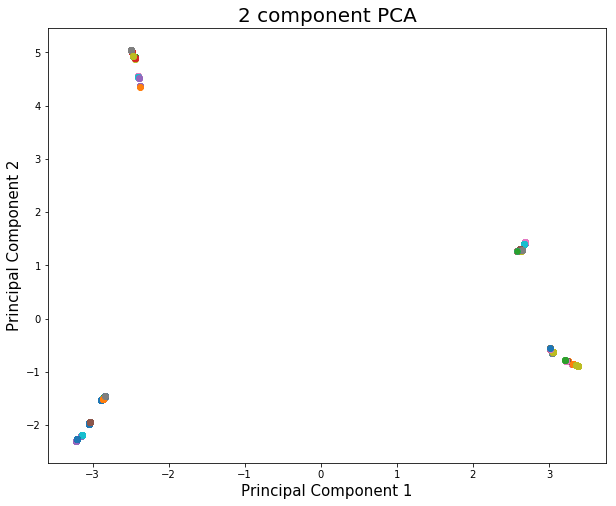

In [81]:
fg1 = plt.figure(figsize=(10,8))
ax = fg1.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for trgt in np.unique(targets):
    idxKeep = princComp_df['Label'] == trgt
    ax.scatter(princComp_df.loc[idxKeep, 'PrincipalComponent 1'],
               princComp_df.loc[idxKeep, 'PrincipalComponent 2'],
               s = 30)
#end
#ax.legend(np.unique(targets).astype(int))

## SVM classification

Preventively check whether or not data is linearly separable. 
In two dimensions it looks that data are such only for $L = 1$ that is two categories.

In [83]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.3, random_state = 33)
Ytrain = np.ravel(Ytrain)
Ytest = np.ravel(Ytest)

clfSVM = svm.SVC(kernel='linear', gamma='auto', verbose=True)
clfSVM.fit(Xtrain, Ytrain)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [84]:
yPred = clfSVM.predict(Xtest)
scores = clfSVM.score(Xtest, Ytest)
print(scores)
print(accuracy_score(Ytest,yPred))

1.0
1.0


In [85]:
print(confusion_matrix(Ytest, yPred))
print(classification_report(Ytest, yPred, labels = np.unique(yPred)))

[[204   0   0   0]
 [  0  93   0   0]
 [  0   0 101   0]
 [  0   0   0 202]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00       101
           4       1.00      1.00      1.00       202

   micro avg       1.00      1.00      1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [86]:
np.unique(Ytest)

array([1, 2, 3, 4])

In [87]:
np.unique(yPred)

array([1, 2, 3, 4])

## Tree Classification

Anche con data set non preprocessato

In [88]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.3, random_state = 33)
Ytrain = np.ravel(Ytrain)
Ytest = np.ravel(Ytest)

clfTree = tree.DecisionTreeClassifier()
clfTree.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [89]:
yPred = clfTree.predict(Xtest)

print(accuracy_score(Ytest,yPred))

1.0


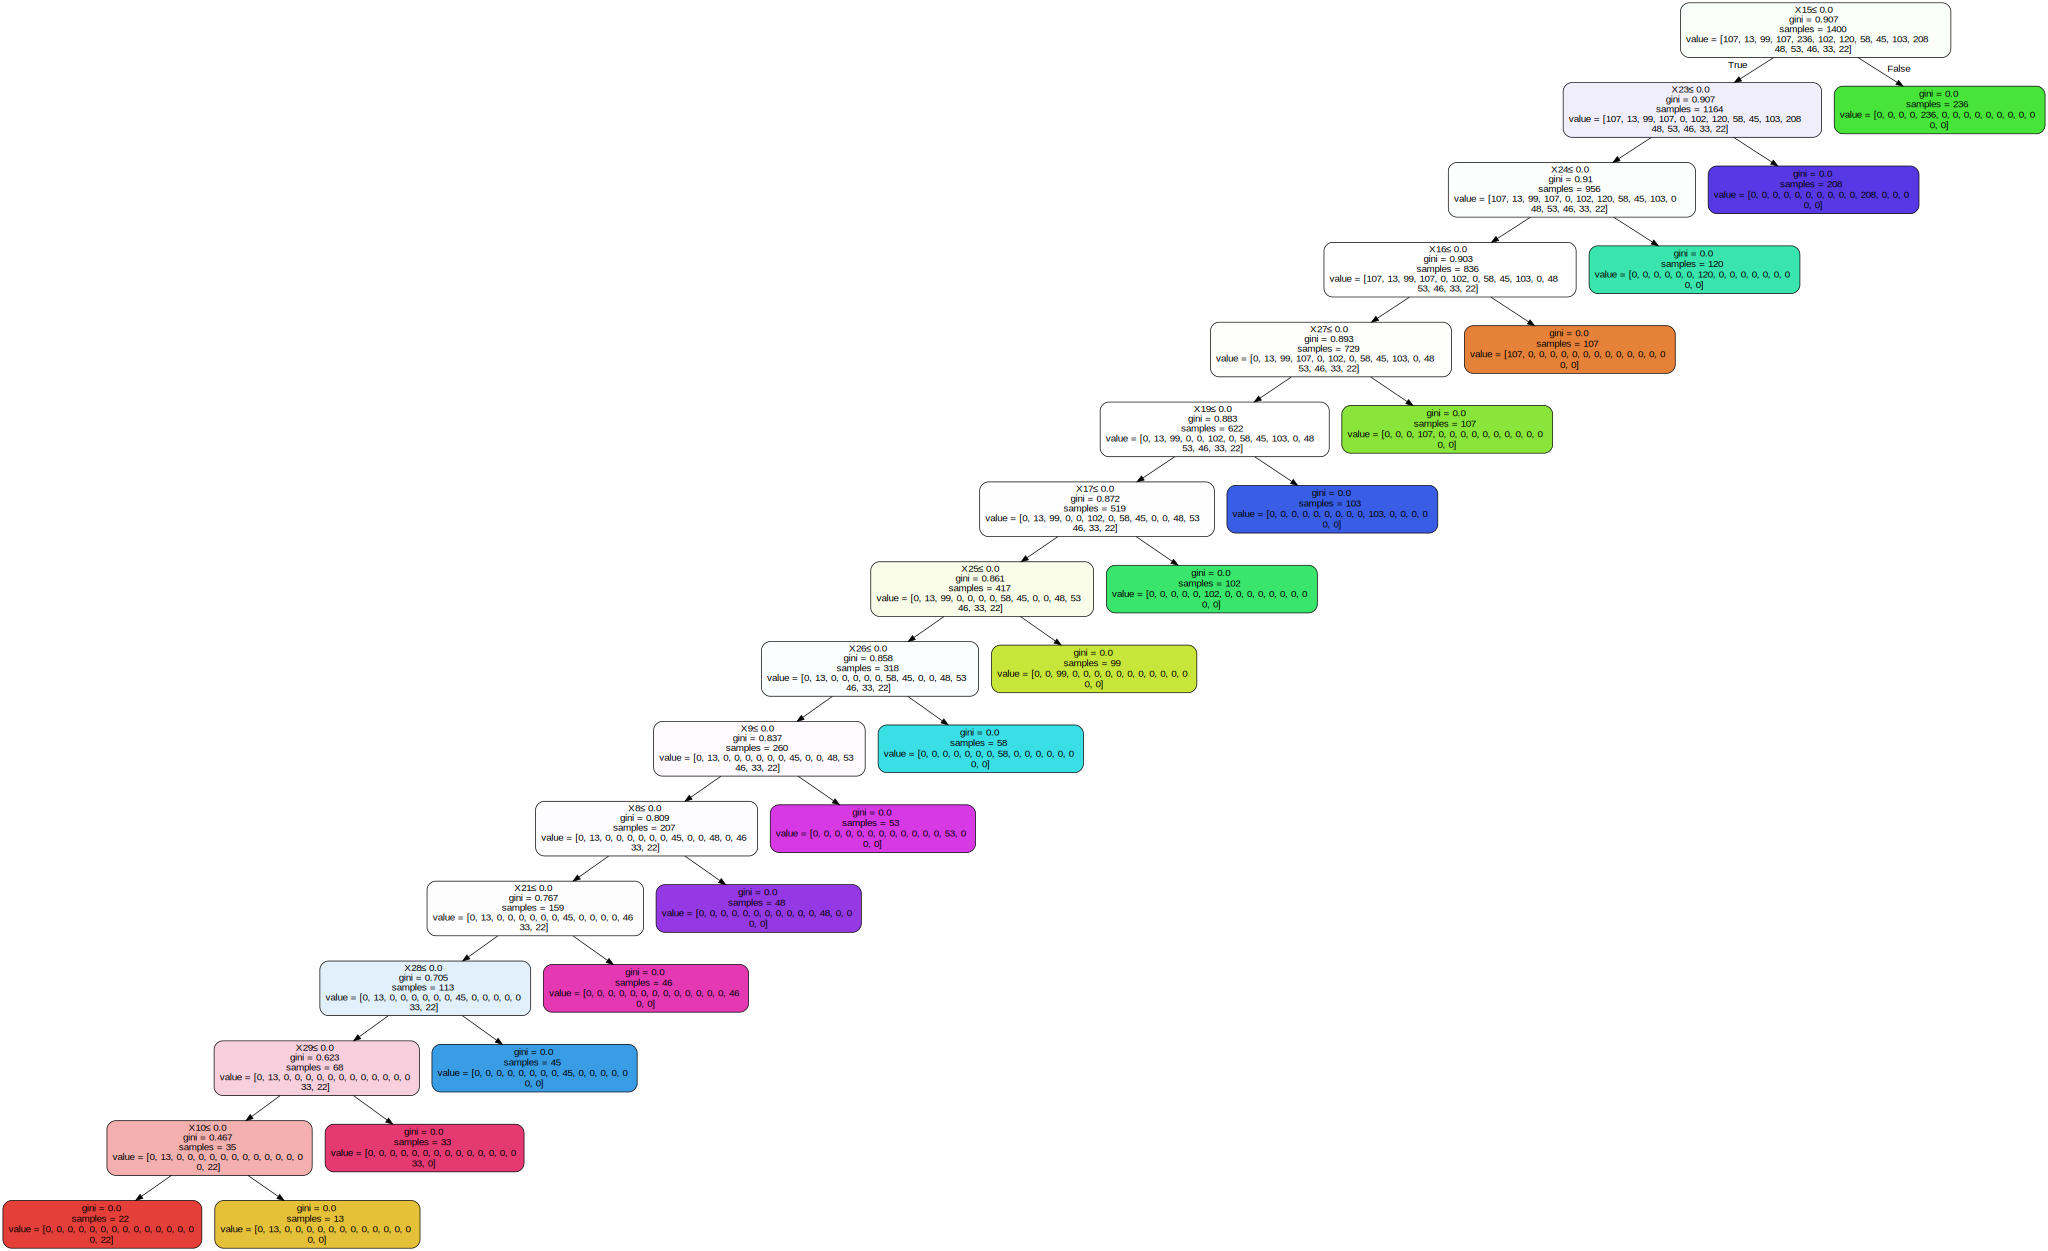

In [52]:
import graphviz

dotData = tree.export_graphviz(clfTree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dotData)
graph